<a href="https://colab.research.google.com/github/Abugahh/LDM/blob/main/Language_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

----

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts

from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense

In [ ]:
#load dataset
df = pd.read_csv('language.csv')
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Text,Language
0,jeg er virkelig ked af det.,Danish
1,Den funktionsprincip som ligger till grund för...,Sweedish
2,Ad agosto 2015 Wikipedia conteneva in totale p...,Italian
3,Uma situação complicada é quando você não cons...,Portugeese
4,συμφωνώ και διαφωνώ.,Greek


-----

In [ ]:
#eliminating nulls
df = df.dropna()

#to lowercase
df["Text"] = df["Text"].str.lower()

#eliminating @ symbol
df["Text"] = df["Text"].str.replace("@", "")

#eliminating # symbol
df["Text"] = df["Text"].str.replace("#", "")

#eliminating digits
df["Text"] = df["Text"].str.replace("\d", "")

#eliminating whitespaces
df["Text"] = df["Text"].str.replace("\s+", " ")

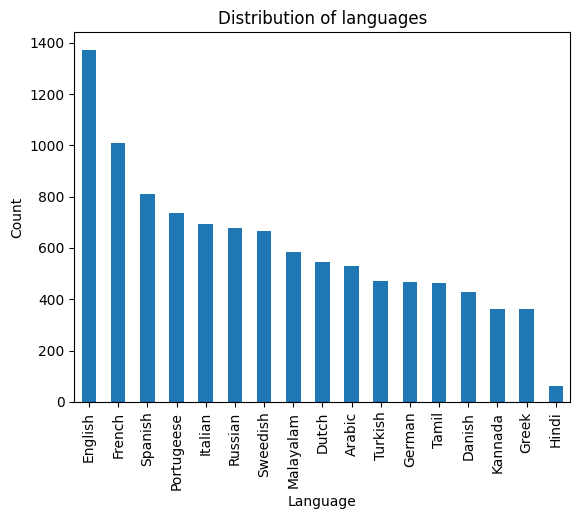

In [ ]:
import matplotlib.pyplot as plt
df['Language'].value_counts().plot(kind='bar')
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Distribution of languages')
plt.show()

In [ ]:
#label encoding
label_enc = LabelEncoder()
df["Language"] = label_enc.fit_transform(df["Language"])
df.head()

,Text,Language
0,jeg er virkelig ked af det.,1
1,den funktionsprincip som ligger till grund för...,14
2,ad agosto wikipedia conteneva in totale più di...,8
3,uma situação complicada é quando você não cons...,11
4,συμφωνώ και διαφωνώ.,6


In [ ]:
#retrieving initial labels for languages
language_names = label_enc.classes_
print(language_names)

index_counter = 0
for language in language_names:
  print(index_counter, language)
  index_counter += 1


['Arabic' 'Danish' 'Dutch' 'English' 'French' 'German' 'Greek' 'Hindi'
 'Italian' 'Kannada' 'Malayalam' 'Portugeese' 'Russian' 'Spanish'
 'Sweedish' 'Tamil' 'Turkish']
0 Arabic
1 Danish
2 Dutch
3 English
4 French
5 German
6 Greek
7 Hindi
8 Italian
9 Kannada
10 Malayalam
11 Portugeese
12 Russian
13 Spanish
14 Sweedish
15 Tamil
16 Turkish


In [ ]:
#text
text = df["Text"]

#labels
labels = df["Language"]
print("Labels:", len(set(labels)))

Labels: 17


In [ ]:
#splitting dataset
x_train, x_test, y_train, y_test = tts(text, labels, test_size = 0.2, random_state = 35)

In [ ]:
#creating vocabulary using all sets
texts = x_train

In [ ]:
#tokenizing
tokenizer = TfidfVectorizer(max_features=1000)
tokenizer.fit(texts)

TfidfVectorizer(max_features=1000)

In [ ]:
#sequencing
train_seq = tokenizer.transform(x_train).toarray()
test_seq = tokenizer.transform(x_test).toarray()

train_labels = np.array(y_train)
test_labels = np.array(y_test)

In [ ]:
model = Sequential()

#1st hidden layer
model.add(Dense(120, activation="relu", input_shape=(train_seq.shape[1],)))

#2nd hidden layer
model.add(Dense(150, activation="relu"))

#output layer
model.add(Dense(17, activation="softmax"))

# always the last layer should have neurons=to no of lables

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 120)               120120    
                                                                 
 dense_1 (Dense)             (None, 150)               18150     
                                                                 
 dense_2 (Dense)             (None, 17)                2567      
                                                                 
Total params: 140,837
Trainable params: 140,837
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
#fitting ANN
history = model.fit(
    train_seq, ##x
    train_labels,##y
    validation_split=0.2,##for assesing the model during the training
    epochs=20, ## running through the hidden layers
    batch_size=32 ##
)

Epoch 1/20
205/205 [==============================] - 7s 5ms/step - loss: 1.2854 - accuracy: 0.6747 - val_loss: 0.3303 - val_accuracy: 0.9219
Epoch 2/20
205/205 [==============================] - 1s 4ms/step - loss: 0.2422 - accuracy: 0.9339 - val_loss: 0.2584 - val_accuracy: 0.9231
Epoch 3/20
205/205 [==============================] - 1s 4ms/step - loss: 0.1998 - accuracy: 0.9406 - val_loss: 0.2555 - val_accuracy: 0.9206
Epoch 4/20
205/205 [==============================] - 1s 4ms/step - loss: 0.1906 - accuracy: 0.9423 - val_loss: 0.2633 - val_accuracy: 0.9188
Epoch 5/20
205/205 [==============================] - 1s 4ms/step - loss: 0.1867 - accuracy: 0.9423 - val_loss: 0.2539 - val_accuracy: 0.9206
Epoch 6/20
205/205 [==============================] - 1s 4ms/step - loss: 0.1841 - accuracy: 0.9431 - val_loss: 0.2502 - val_accuracy: 0.9212
Epoch 7/20
205/205 [==============================] - 1s 4ms/step - loss: 0.1823 - accuracy: 0.9420 - val_loss: 0.2581 - val_accuracy: 0.9225
Epoch 

In [ ]:
#evaluation
model.evaluate(test_seq, test_labels)

64/64 [==============================] - 0s 3ms/step - loss: 0.2814 - accuracy: 0.9189


[0.28144529461860657, 0.9189453125]

In [ ]:
#user text
user_input = input("Please enter your message: ")

#tokenizing user message
message = tokenizer.transform([user_input]).toarray()

#scores for 17 predicted classes
lang_list = model.predict(message)
lang_list

Please enter your message: lo que sea sera
1/1 [==============================] - 0s 22ms/step


array([[1.7344291e-05, 1.4658167e-04, 1.9620314e-04, 2.2100699e-05,
        1.0242146e-03, 1.3683022e-04, 7.4705124e-05, 4.4065450e-06,
        1.1316466e-03, 3.9605125e-05, 5.6344851e-07, 2.7060083e-01,
        4.6211170e-04, 7.2555727e-01, 3.5543559e-04, 2.8155411e-05,
        2.0204614e-04]], dtype=float32)

In [ ]:
#find class with max score
class_index = np.argmax(lang_list,axis=1)

#get lang
print(language_names[class_index])

['Spanish']


In [ ]:
!pip install -q gradio

import gradio as gr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.0/289.0 kB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 5.8 MB/s eta 0:

In [ ]:
def lang_pred(message):
  #tokenizing user message
  message = tokenizer.transform([user_input]).toarray()

  #scores for 17 predicted classes
  lang_list = model.predict(message)

  return language_names[class_index][0]

In [ ]:
u_interface = gr.Interface(fn=lang_pred, inputs='text', outputs='text', debug=False)
u_interface.launch(share=True)

<ipython-input-23-309ab4bb9732>:1: GradioUnusedKwargWarning: You have unused kwarg parameters in Interface, please remove them: {'debug': False}
  u_interface = gr.Interface(fn=lang_pred, inputs='text', outputs='text', debug=False)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://803a44042eb662b951.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
